# 🌱 Análise da Qualidade do Ar em Capitais Brasileiras

## 1. Introdução

A qualidade do ar é um fator fundamental para a saúde pública e a preservação do meio ambiente. Em grandes cidades, o aumento do tráfego de veículos, da atividade industrial e das queimadas pode elevar a concentração de poluentes como material particulado (PM2.5 e PM10) e ozônio, colocando a população em risco. Este projeto tem como objetivo analisar padrões de poluição atmosférica em algumas capitais brasileiras, identificando tendências temporais e diferenças regionais.

---

## 2. Objetivo

Explorar os dados sobre qualidade do ar em cidades brasileiras para identificar padrões, variações sazonais e possíveis implicações para a saúde pública. O foco é observar os níveis de PM2.5, PM10 e ozônio em São Paulo, Rio de Janeiro e Belo Horizonte.

---

## 3. Fonte de Dados

Os dados utilizados neste projeto foram obtidos a partir de uma base disponível no Kaggle:

📂 Kaggle Dataset: [Air Quality in Brazil](https://www.kaggle.com/datasets/matheusfreitag/air-quality-brazil)

A base foi simplificada e simulada neste projeto para fins didáticos.

---

## 4. Metodologia

- Importação dos dados
- Limpeza e tratamento (datas, colunas, dados faltantes)
- Análise exploratória (gráficos e estatísticas)
- Comparações por cidade e ao longo do tempo

---


In [ ]:
# 1. Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

In [ ]:
# 2. Carrega os dados
df = pd.read_csv('sp_air_quality.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'])

# 4. Criação de uma coluna com o mês
df['mes'] = df['Datetime'].dt.month

# Renoeando as colunas
df.rename(columns={
    'Datetime': 'data',
    'Station': 'cidade',
    'PM2.5': 'pm2_5',
    'PM10': 'pm10',
    'O3': 'ozonio'
}, inplace=True)

print(df.head())

                 data     cidade  Benzene  CO  pm10  pm2_5  NO2  ozonio  SO2  \
0 2013-05-08 01:00:00  Araçatuba      NaN NaN  30.0    NaN  NaN     7.0  NaN   
1 2013-05-08 02:00:00  Araçatuba      NaN NaN  30.0    NaN  NaN     6.0  NaN   
2 2013-05-08 03:00:00  Araçatuba      NaN NaN  31.0    NaN  NaN     6.0  NaN   
3 2013-05-08 04:00:00  Araçatuba      NaN NaN  31.0    NaN  NaN     4.0  NaN   
4 2013-05-08 05:00:00  Araçatuba      NaN NaN  32.0    NaN  NaN     4.0  NaN   

   Toluene  TRS  mes  
0      NaN  NaN    5  
1      NaN  NaN    5  
2      NaN  NaN    5  
3      NaN  NaN    5  
4      NaN  NaN    5  


In [ ]:
# Limpeza dos dados

# Lista dos poluentes de interesse
poluentes = ['pm2_5', 'pm10', 'ozonio']

# Remove linhas que não têm nenhum dos poluentes
df = df.dropna(subset=poluentes, how='all')

# Ordena antes de setar o índice para garantir a ordem temporal
df.sort_values(by=['cidade', 'data'], inplace=True)

# Define a coluna 'data' como índice
df.set_index('data', inplace=True)

# Interpolação temporal por cidade
df[poluentes] = df.groupby('cidade')[poluentes].transform(
    lambda group: group.interpolate(method='time', limit=50)
)

# Remove colunas com mais de 90% de valores nulos
limite_nulos = 0.9
df = df.loc[:, df.isnull().mean() < limite_nulos]

print(df.head())
print(df.isnull().sum())


                        cidade  CO  pm10  pm2_5  NO2  ozonio  SO2  mes
data                                                                  
2018-02-26 00:00:00  Americana NaN   NaN    NaN  NaN     6.0  NaN    2
2018-02-26 18:00:00  Americana NaN   NaN    NaN  NaN    12.0  NaN    2
2018-02-26 19:00:00  Americana NaN   NaN    NaN  NaN    11.0  NaN    2
2018-02-26 20:00:00  Americana NaN   NaN    NaN  NaN    10.0  NaN    2
2018-02-26 21:00:00  Americana NaN   NaN    NaN  NaN     9.0  NaN    2
cidade          0
CO        2380396
pm10       538419
pm2_5     2287261
NO2       1416669
ozonio     606709
SO2       2577817
mes             0
dtype: int64


## Interpolação
**A Interpolação** é uma técnica para **estimar valores ausentes** (NaN) em uma série de dados com base nos valores ao redor.

É muito útil em **séries temporais** como dados ambientais, onde sensores às vezes falham por algumas horas ou dias.

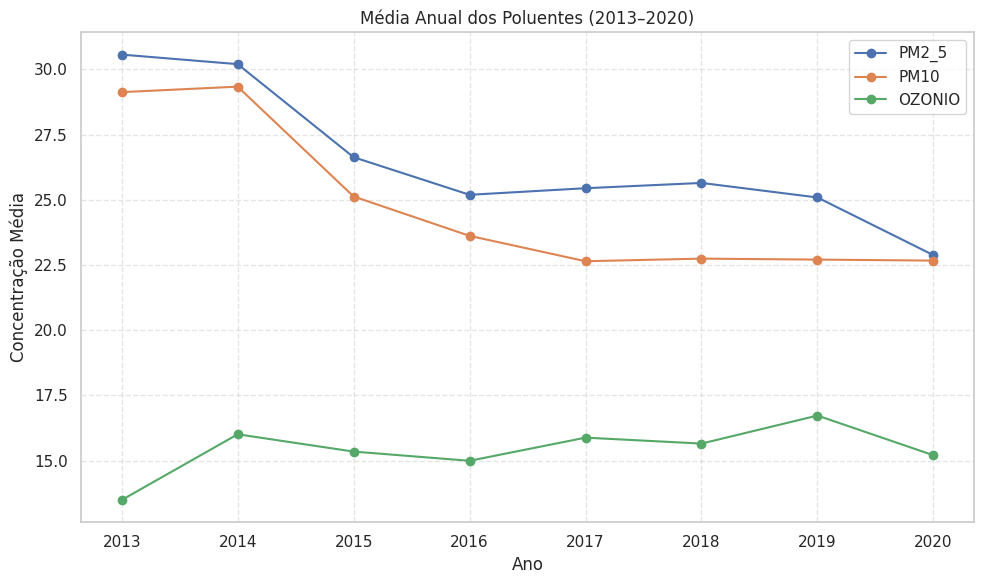

In [ ]:
import matplotlib.pyplot as plt

# Garante que 'data' seja datetime (caso não esteja mais no índice)
if not isinstance(df.index, pd.DatetimeIndex):
    df['data'] = pd.to_datetime(df['data'])
    df.set_index('data', inplace=True)

df.sort_index(inplace=True)

df_filtrado = df.loc['2013':'2020']

# Agrupa por ano e calcula média dos poluentes
media_anual = df_filtrado.groupby(df_filtrado.index.year)[['pm2_5', 'pm10', 'ozonio']].mean()

# Geração do gráfico
plt.figure(figsize=(10, 6))
for poluente in media_anual.columns:
    plt.plot(media_anual.index, media_anual[poluente], marker='o', label=poluente.upper())

plt.title('Média Anual dos Poluentes (2013–2020)')
plt.xlabel('Ano')
plt.ylabel('Concentração Média')
plt.xticks([2013,2014,2015,2016,2017,2018, 2019, 2020])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


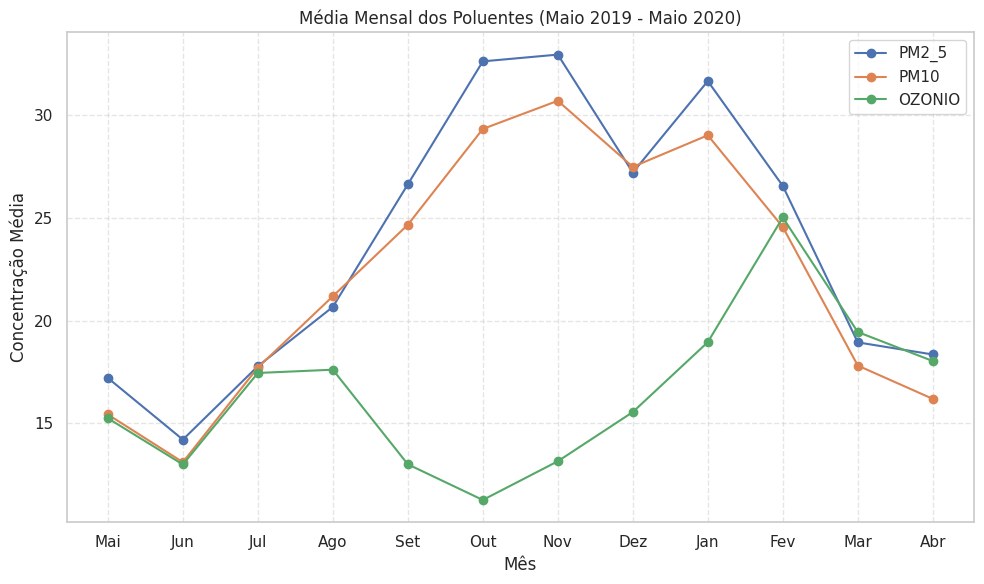

In [ ]:
import matplotlib.pyplot as plt

# Garante que 'data' esteja no índice e que esteja ordenado
if not isinstance(df.index, pd.DatetimeIndex):
    df['data'] = pd.to_datetime(df['data'])
    df.set_index('data', inplace=True)

# Ordena o índice ASC
df.sort_index(inplace=True)

df_filtrado = df.loc['2019-05-01':'2020-05-31']

# Agrupa por mês e calcula a média dos poluentes
media_mensal = df_filtrado.groupby(df_filtrado.index.month)[['pm2_5', 'pm10', 'ozonio']].mean()

# Geração do gráfico
plt.figure(figsize=(10, 6))
for poluente in media_mensal.columns:
    plt.plot(media_mensal.index, media_mensal[poluente], marker='o', label=poluente.upper())

plt.title('Média Mensal dos Poluentes (Maio 2019 - Maio 2020)')
plt.xlabel('Mês')
plt.ylabel('Concentração Média')
plt.xticks(range(1, 13), ['Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez', 'Jan', 'Fev', 'Mar', 'Abr'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-46-1409dfb75e71>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['mes'] = df_2019.index.month


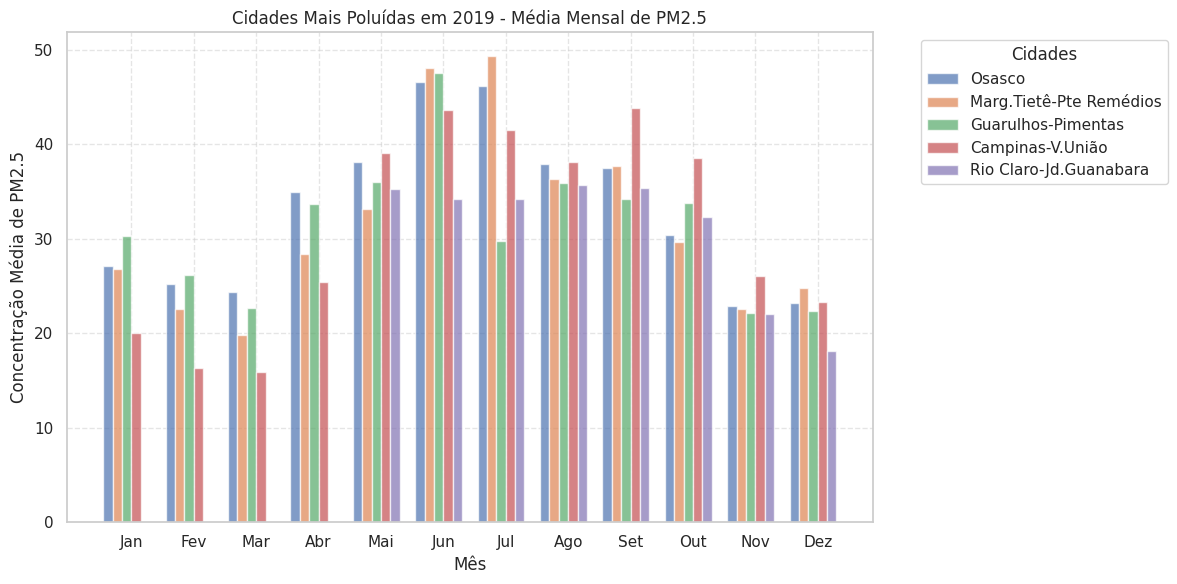

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Garante que 'data' esteja no índice e que esteja ordenado
if not isinstance(df.index, pd.DatetimeIndex):
    df['data'] = pd.to_datetime(df['data'])
    df.set_index('data', inplace=True)

df_2019 = df.loc['2019-01-01':'2019-12-31']

# Adiciona uma coluna com o mês extraído da data
df_2019['mes'] = df_2019.index.month

# Agrupa por cidade e mês, calculando a média de cada poluente
media_mensal_cidade = df_2019.groupby(['mes', 'cidade'])[['pm2_5']].mean()

# Calcula a média anual por cidade para identificar as mais poluídas
media_anual_cidade = media_mensal_cidade.groupby('cidade')[['pm2_5']].mean()

# Ordena as cidades pela média anual de PM2.5
cidades_mais_poluídas = media_anual_cidade['pm2_5'].sort_values(ascending=False).head(5).index

# Filtra os dados apenas para as cidades mais poluídas
df_cidades_mais_poluídas = media_mensal_cidade[media_mensal_cidade.index.get_level_values('cidade').isin(cidades_mais_poluídas)]

# Geração do gráfico de barras
plt.figure(figsize=(12, 6))

largura_barras = 0.15

# Ajuste de posição das barras para cada cidade
for i, cidade in enumerate(cidades_mais_poluídas):
    cidade_data = df_cidades_mais_poluídas[df_cidades_mais_poluídas.index.get_level_values('cidade') == cidade]

    # Criando deslocamento para barras
    posicao = np.array(cidade_data.index.get_level_values('mes')) + (i - len(cidades_mais_poluídas) / 2) * largura_barras

    # Plotando as barras
    plt.bar(posicao, cidade_data['pm2_5'],
            label=f"{cidade}", alpha=0.7, width=largura_barras)

# Ajustes para o gráfico
plt.title('Cidades Mais Poluídas em 2019 - Média Mensal de PM2.5')
plt.xlabel('Mês')
plt.ylabel('Concentração Média de PM2.5')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Cidades', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 5. Resultados

- **A longo prazo** a emissão de gases no geral no maior estado brasileiro vem diminuindo relativamente.
- É possível observar que **os meses em que há maior incidência de poluentes** no geral são junho e julho.
- Na análise dos dados referentes a **2019 e 2020** revelam que o evento da **Pandemia** causou uma redução nos gases poluentes.
- Dentre as 5 cidades mais emissoras, 4 se encontram na **Grande São Paulo**.

---

## 6. Conclusão

A análise dos dados de poluição atmosférica no Estado de **São Paulo** revelou algumas tendências importantes que podem orientar políticas públicas e ações em áreas críticas de gestão ambiental.

- **A redução a longo prazo nas emissões de gases** reflete um esforço contínuo de controle e mitigação de poluentes, embora ainda haja variações sazonais significativas.

- Os meses de **junho e julho** se destacam como períodos de maior emissão, possivelmente devido a condições climáticas e atividades específicas relacionadas a essas épocas do ano, como a maior locomoção usando **carros**.

- **A pandemia de COVID-19** teve um impacto notável na qualidade do ar, com uma **redução substancial** nas emissões de poluentes em 2020, indicando que a diminuição de **atividades industriais, transporte e outros fatores humanos** pode resultar em uma melhora significativa na qualidade do ar. Esse fenômeno destaca a importância de políticas públicas focadas na redução de emissões e na promoção de práticas sustentáveis, como o trabalho remoto, entre outras medidas mesmo após o fim de situações excepcionais como a pandemia.

- A análise também revela que a **Grande São Paulo** concentra uma parte significativa das cidades com maior emissão de poluentes, destacando a necessidade urgente de ações específicas para essas áreas metropolitanas, que enfrentam um conjunto complexo de problemas relacionados ao **crescimento urbano e à industrialização**. A redução contínua das emissões nas principais cidades da região pode ser um passo fundamental para a melhoria da **qualidade de vida e da saúde ambiental** para os habitantes dessas localidades.

---

## 7. Referências

- Kaggle Dataset: https://www.kaggle.com/datasets/amandalk/sp-air-quality
- CETESB – Qualidade do Ar: https://cetesb.sp.gov.br/ar/
- INMET – Instituto Nacional de Meteorologia: https://www.gov.br/inmet
- IBGE – Instituto Brasileiro de Geografia e Estatística: https://www.ibge.gov.br/

---

# Observação Importante:

🧪 O que são PM2.5 e PM10?
PM significa Material Particulado – que são partículas sólidas e líquidas suspensas no ar, como poeira, fuligem, fumaça, poluição de carros e queima de lixo.

PM10: são partículas inaláveis com diâmetro de até 10 micrômetros. Elas são grandes o suficiente para entrar no nariz e garganta. Podem causar irritações respiratórias, tosses e problemas no nariz e garganta.

PM2.5: são ainda menores, com menos de 2,5 micrômetros de diâmetro. Por serem tão finas, conseguem penetrar profundamente nos pulmões e até entrar na corrente sanguínea. Estão mais associadas a problemas graves de saúde, como doenças cardíacas, respiratórias e até câncer.

🧬 Em resumo:

Quanto menor o número, mais perigosa é a partícula para a saúde.